In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns = ["RowNumber","CustomerId","Surname"],inplace= True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
X = df.drop(columns=['Exited'])


Y = df['Exited']



In [6]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


pipeline = Pipeline(
    [('Categorizer', ColumnTransformer(
         [ # Gender
          ("Gender Label encoder", OneHotEncoder(categories='auto', drop='first'), [2]),
           # Geography
          ("Geography One Hot", OneHotEncoder(categories='auto', drop='first'), [1])
         ], remainder='passthrough', n_jobs=1)),
     # Standard Scaler for the classifier
    ('Normalizer', StandardScaler())
    ])
X = pipeline.fit_transform(X)

In [8]:
X

array([[-1.09598752, -0.57873591, -0.57380915, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.09598752, -0.57873591,  1.74273971, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.09598752, -0.57873591, -0.57380915, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [-1.09598752, -0.57873591, -0.57380915, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 0.91241915,  1.72790383, -0.57380915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [-1.09598752, -0.57873591, -0.57380915, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout , BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau


In [10]:
print(X_train.shape)
print(Y_train.shape)


(8000, 11)
(8000,)


In [11]:

model = Sequential()

# First Layer (with L2 regularization and Batch Normalization)
model.add(Dense(30, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2'))
model.add(BatchNormalization())  # Batch Normalization
model.add(Dropout(0.3))  # Dropout to prevent overfitting

# Second Layer
model.add(Dense(100, activation='relu'))  # Changed activation to 'relu' for consistency
model.add(BatchNormalization())  # Batch Normalization
model.add(Dropout(0.5))  # Dropout to prevent overfitting

# Third Layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Fourth Layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification





In [12]:
# Optimizer and Learning Rate
optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
# Learning Rate Reduction on Plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)




In [13]:
# Fit the model without class weights for testing
model.fit(x=X_train, y=Y_train, epochs=10, batch_size=72,
          validation_data=(X_test, Y_test),
          callbacks=[reduce_lr])  # Omit class_weight

Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.5639 - loss: 1.4424 - val_accuracy: 0.8070 - val_loss: 0.9724 - learning_rate: 0.0010
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7089 - loss: 1.0921 - val_accuracy: 0.8090 - val_loss: 0.8559 - learning_rate: 0.0010
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7550 - loss: 0.9489 - val_accuracy: 0.8160 - val_loss: 0.7681 - learning_rate: 0.0010
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7778 - loss: 0.8498 - val_accuracy: 0.8235 - val_loss: 0.6973 - learning_rate: 0.0010
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7826 - loss: 0.7720 - val_accuracy: 0.8255 - val_loss: 0.6359 - learning_rate: 0.0010
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7870 - loss: 0.7117 - val_accuracy: 0.8350 - val_loss: 0.5857 - learning_rate: 0.0010
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8023 - loss: 0.6641 -

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30)                  │             120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │           3,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,925 (288.77 KB)

 Trainable params: 24,421 (95.39 KB)

 Non-trainable params: 660 (2.58 KB)

 Optimizer params: 48,844 (190.80 KB)

In [15]:
model.weights

[<KerasVariable shape=(11, 30), dtype=float32, path=sequential/dense/kernel>,
 <KerasVariable shape=(30,), dtype=float32, path=sequential/dense/bias>,
 <KerasVariable shape=(30,), dtype=float32, path=sequential/batch_normalization/gamma>,
 <KerasVariable shape=(30,), dtype=float32, path=sequential/batch_normalization/beta>,
 <KerasVariable shape=(30,), dtype=float32, path=sequential/batch_normalization/moving_mean>,
 <KerasVariable shape=(30,), dtype=float32, path=sequential/batch_normalization/moving_variance>,
 <KerasVariable shape=(30, 100), dtype=float32, path=sequential/dense_1/kernel>,
 <KerasVariable shape=(100,), dtype=float32, path=sequential/dense_1/bias>,
 <KerasVariable shape=(100,), dtype=float32, path=sequential/batch_normalization_1/gamma>,
 <KerasVariable shape=(100,), dtype=float32, path=sequential/batch_normalization_1/beta>,
 <KerasVariable shape=(100,), dtype=float32, path=sequential/batch_normalization_1/moving_mean>,
 <KerasVariable shape=(100,), dtype=float32, pa

In [16]:
model.layers

[<Dense name=dense, built=True>,
 <BatchNormalization name=batch_normalization, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>,
 <BatchNormalization name=batch_normalization_1, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_2, built=True>,
 <BatchNormalization name=batch_normalization_2, built=True>,
 <Dropout name=dropout_2, built=True>,
 <Dense name=dense_3, built=True>,
 <BatchNormalization name=batch_normalization_3, built=True>,
 <Dropout name=dropout_3, built=True>,
 <Dense name=dense_4, built=True>]

<Axes: >

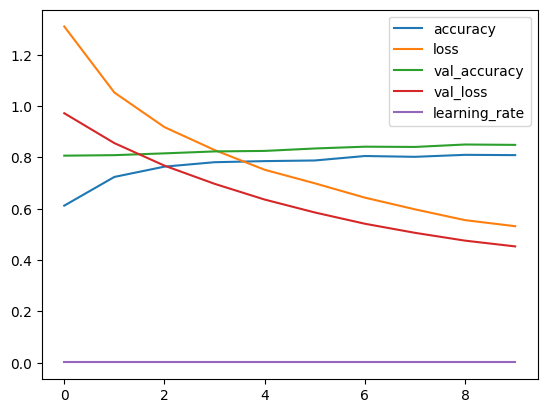

In [17]:
Results=pd.DataFrame(model.history.history)
Results.plot()

<Axes: >

<Figure size 1200x600 with 0 Axes>

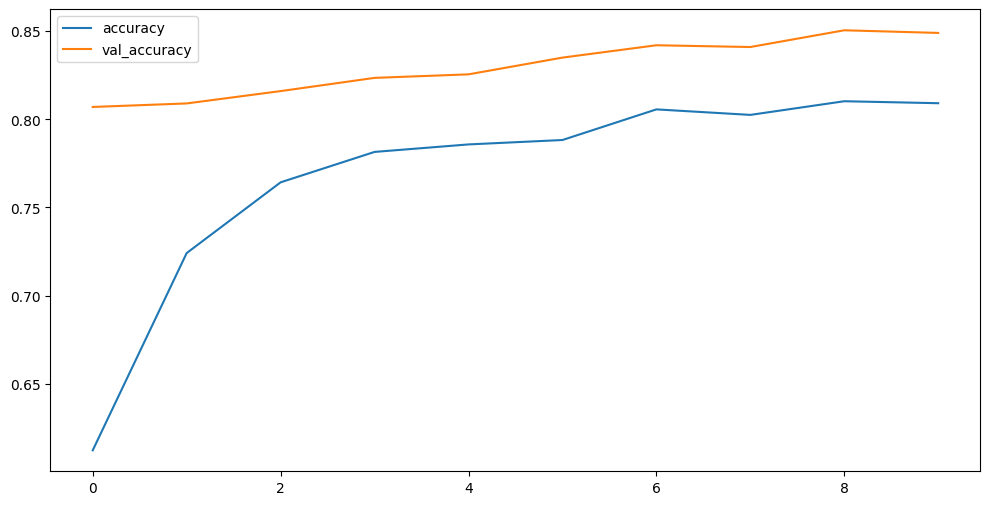

In [18]:
plt.figure(figsize=(12,6))
Results[['accuracy','val_accuracy']].plot(figsize=(12,6))


<Axes: >

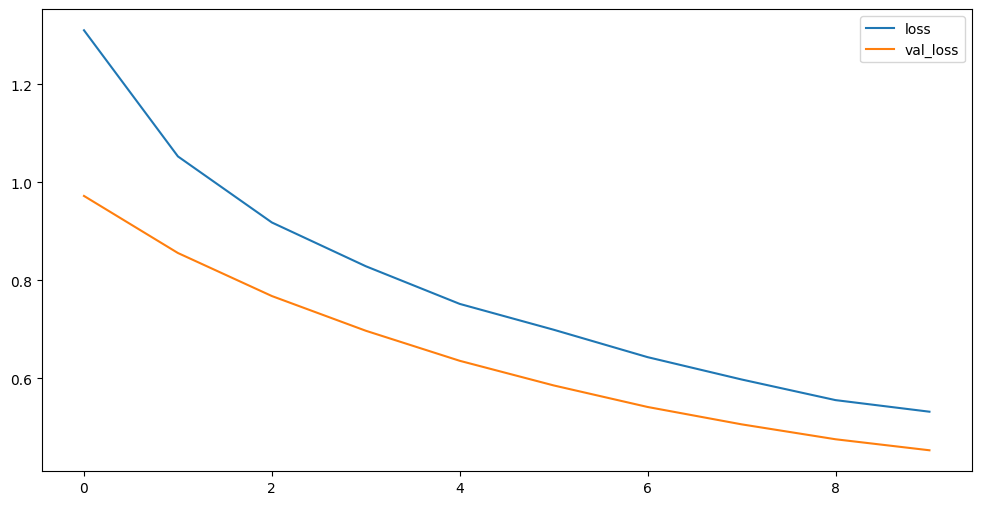

In [19]:
Results[['loss','val_loss']].plot(figsize=(12,6))


In [20]:
model.evaluate(x=X_test,y=Y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8472 - loss: 0.4547


[0.4533379375934601, 0.8489999771118164]

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
predictions=(model.predict(X_test) >0.5).astype('int32')
predictions

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int32)

In [23]:
predictions.shape,Y_test.shape

((2000, 1), (2000,))

In [24]:
cm=confusion_matrix(Y_test,predictions)
cm

array([[1560,   47],
       [ 255,  138]])

In [25]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1607
           1       0.75      0.35      0.48       393

    accuracy                           0.85      2000
   macro avg       0.80      0.66      0.69      2000
weighted avg       0.84      0.85      0.83      2000



In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential()

# First Layer (with L2 regularization and Batch Normalization)
model.add(Dense(30, activation='relu', kernel_initializer='he_normal', kernel_regularizer='l2'))
model.add(BatchNormalization())  # Batch Normalization
model.add(Dropout(0.3))  # Dropout to prevent overfitting

# Second Layer (Added L2 regularization here as well for consistency)
model.add(Dense(100, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Third Layer (L2 regularization added)
model.add(Dense(100, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Fourth Layer (L2 regularization added)
model.add(Dense(100, activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output Layer (Binary classification)
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Optimizer and Learning Rate
optimizer = Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Learning Rate Reduction on Plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Fit the model without class weights for testing
model.fit(x=X_train, y=Y_train, epochs=10, batch_size=72,
          validation_data=(X_test, Y_test),
          callbacks=[reduce_lr])  # Omit class_weight


Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5883 - loss: 3.7218 - val_accuracy: 0.8075 - val_loss: 2.7580 - learning_rate: 0.0010
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7205 - loss: 2.7506 - val_accuracy: 0.8065 - val_loss: 2.2094 - learning_rate: 0.0010
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7692 - loss: 2.1921 - val_accuracy: 0.8085 - val_loss: 1.7952 - learning_rate: 0.0010
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7802 - loss: 1.7929 - val_accuracy: 0.8190 - val_loss: 1.4759 - learning_rate: 0.0010
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7918 - loss: 1.4793 - val_accuracy: 0.8135 - val_loss: 1.2324 - learning_rate: 0.0010
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8005 - loss: 1.2277 - val_accuracy: 0.8165 - val_loss: 1.0340 - learning_rate: 0.0010
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7996 - loss: 1.0537 - 

<Axes: >

<Figure size 1200x600 with 0 Axes>

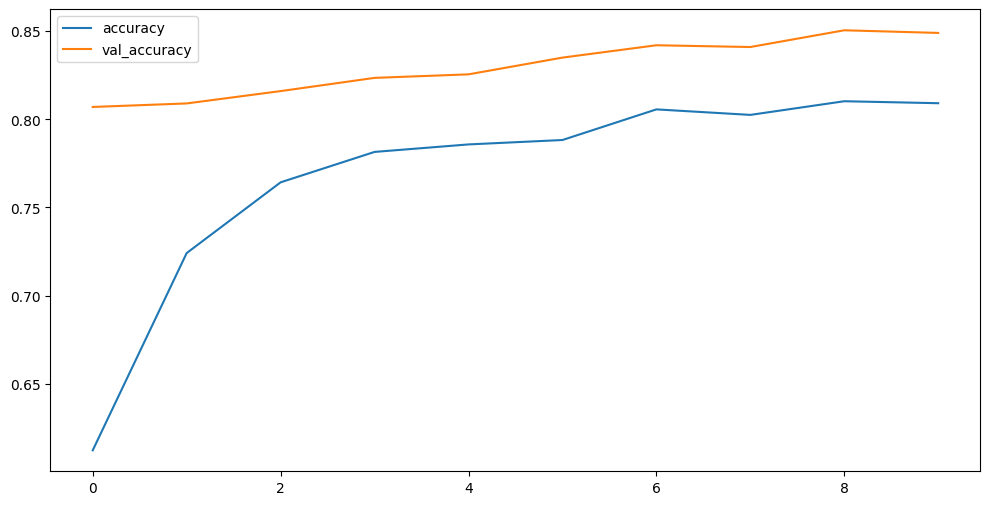

In [28]:
plt.figure(figsize=(12,6))
Results[['accuracy','val_accuracy']].plot(figsize=(12,6))




<Axes: >

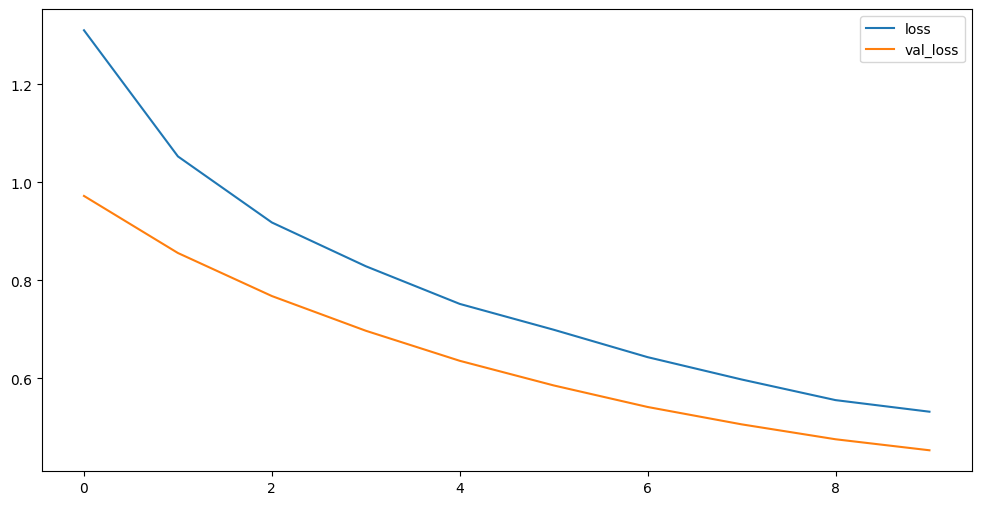

In [29]:
Results[['loss','val_loss']].plot(figsize=(12,6))

In [30]:
model.evaluate(x=X_test,y=Y_test)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8368 - loss: 0.6081


[0.606098473072052, 0.8360000252723694]

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

predictions=(model.predict(X_test) >0.5).astype('int32')
predictions


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [32]:
predictions.shape,Y_test.shape


((2000, 1), (2000,))

In [33]:

cm=confusion_matrix(Y_test,predictions)
cm




array([[1598,    9],
       [ 319,   74]])

In [34]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.99      0.91      1607
           1       0.89      0.19      0.31       393

    accuracy                           0.84      2000
   macro avg       0.86      0.59      0.61      2000
weighted avg       0.84      0.84      0.79      2000

